## Liver Cirrhosis Stage Detection using Machine Learning


Liver cirrhosis is a chronic disease that causes progressive damage to the liver and requires accurate staging for effective treatment planning. Analyzing multiple clinical parameters manually can be complex and time-consuming. This project aims to develop a machine learning model to predict the stage of liver cirrhosis using patient diagnosis data, helping support faster and more accurate medical decision-making.

###Problem Statement

Predicting the stage of liver cirrhosis based on clinical data is challenging and often depends on expert interpretation. There is a need for an automated system that can analyze patient data and accurately determine the disease stage.

### Objective

The objective of this project is to build and evaluate machine learning models that can predict liver cirrhosis stages using patient medical data and identify important features influencing disease progression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import joblib


### 1. Loading the Dataset

The dataset containing liver cirrhosis patient information is loaded into the environment using the Pandas library. The dataset is stored in a DataFrame structure which allows efficient data manipulation and analysis. The first few rows are displayed to understand the data structure.

In [2]:
df = pd.read_csv("liver_cirrhosis.csv")

df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


### 2. Understanding the Dataset

This section explores the dataset to understand its structure, including the number of rows and columns, data types, and summary statistics. This helps identify potential issues such as missing values and incorrect data formats before preprocessing.

In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

df.info()
df.describe()

Shape: (25000, 19)

Columns:
 Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


### 3. Data Cleaning and Missing Value Treatment

Real-world medical datasets often contain missing or incomplete information. In this step, missing values are identified and handled appropriately to ensure that the dataset is suitable for machine learning model training.

In [4]:
# Check missing values
df.isnull().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [5]:
df = df.fillna(method='ffill')

/tmp/ipython-input-569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


### 4. Encoding Categorical Features
Machine learning algorithms require numerical input data. Therefore, categorical variables such as gender, drug type, and clinical indicators are converted into numerical format using encoding techniques. This allows the algorithms to process the data effectively.

In [6]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


### Target Variable Encoding
The target variable (Stage) is encoded into numerical values starting from zero to ensure compatibility with machine learning algorithms such as XGBoost, which require class labels in sequential numeric format.

In [7]:
from sklearn.preprocessing import LabelEncoder

le_stage = LabelEncoder()
df["Stage"] = le_stage.fit_transform(df["Stage"])

print("Unique Stage values:", df["Stage"].unique())

Unique Stage values: [0 1 2]


### 5. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is performed to understand patterns, relationships, and distributions within the dataset. Visualizations such as count plots and correlation heatmaps help identify trends and important features influencing liver disease stages.

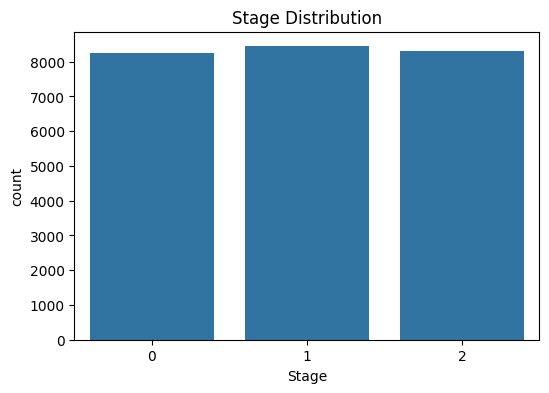

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Stage', data=df)
plt.title("Stage Distribution")
plt.show()

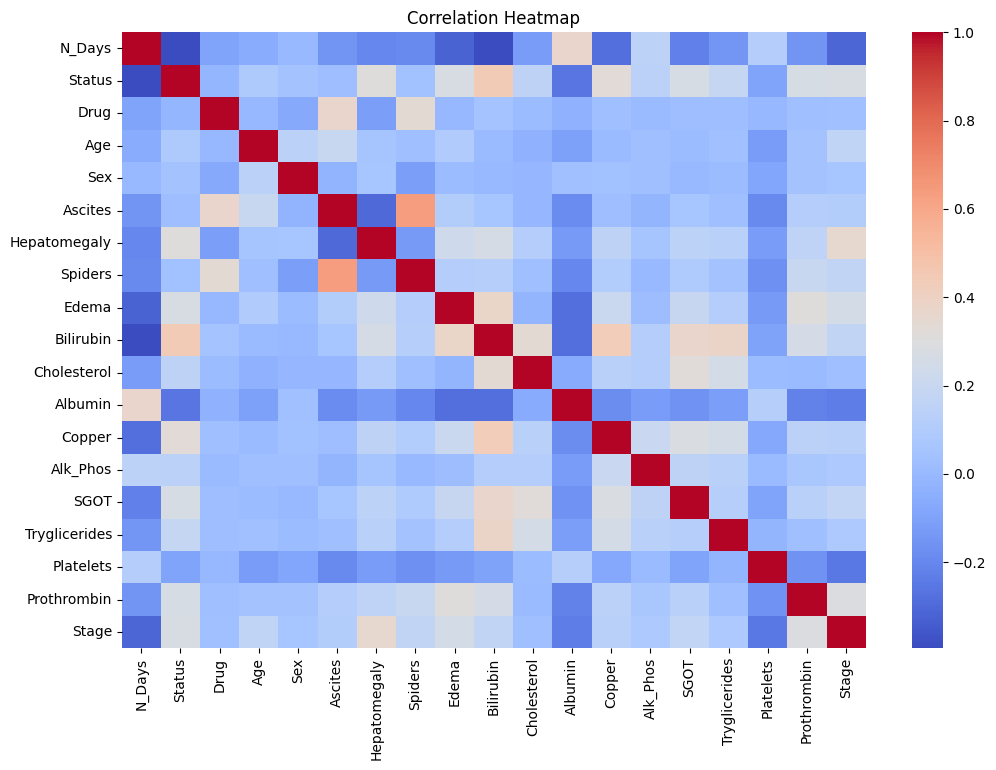

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### 6. Feature Selection and Target Variable

In this step, the dataset is divided into input features and the target variable. The input features represent patient medical data, while the target variable represents the liver cirrhosis stage that the model aims to predict.

In [10]:
X = df.drop("Stage", axis=1)
y = df["Stage"]

In [11]:
print(df["Stage"].unique())

[0 1 2]


### 7. Splitting Data into Training and Testing Sets

The dataset is divided into training and testing subsets. The training data is used to teach the machine learning model, while the testing data is used to evaluate its performance on unseen data. This helps ensure that the model generalizes well.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 8. Feature Scaling and Normalization

Feature scaling is performed to standardize the range of input variables. This improves the performance of certain machine learning algorithms and ensures that all features contribute equally to model training.

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 9. Training Machine Learning Models

Multiple machine learning algorithms are trained using the processed dataset. Models such as Logistic Regression, Decision Tree, Random Forest, and XGBoost are implemented to compare their predictive performance.

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(
        eval_metric='mlogloss',
        use_label_encoder=False
    )
}

results = {}

for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("Model:", name)
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("-"*40)


Model: Logistic Regression
Accuracy: 0.6008
              precision    recall  f1-score   support

           0       0.58      0.61      0.60      1657
           1       0.54      0.51      0.52      1697
           2       0.67      0.69      0.68      1646

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000

----------------------------------------
Model: Decision Tree
Accuracy: 0.9172
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1657
           1       0.90      0.91      0.90      1697
           2       0.94      0.93      0.93      1646

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

----------------------------------------
Model: Random Forest
Accuracy: 0.9558
              precision    recall  f

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [11:27:29] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
Accuracy: 0.9618
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1657
           1       0.95      0.96      0.96      1697
           2       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

----------------------------------------


### 10. Model Performance Comparison

The accuracy of different machine learning models is compared using visualization techniques. This helps identify the best-performing algorithm for predicting liver cirrhosis stages.

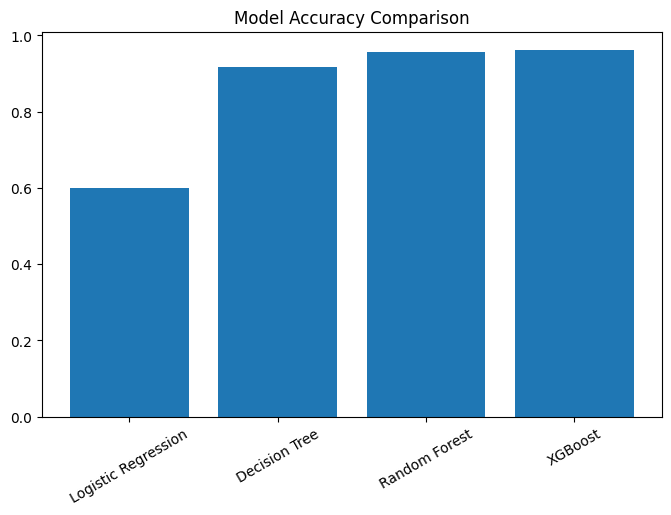

In [15]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()

### 11. Model Evaluation using Confusion Matrix

A confusion matrix is generated to evaluate the performance of the selected model. It provides insights into correct and incorrect predictions made by the model across different classes.

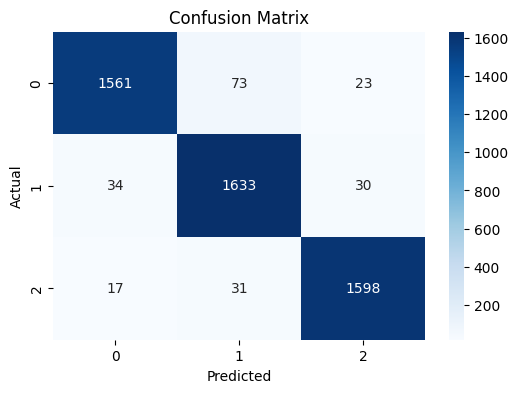

In [16]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 12. Feature Importance Analysis

Feature importance analysis is conducted to identify the most influential medical parameters affecting liver cirrhosis progression. This helps in understanding the model and provides valuable clinical insights.

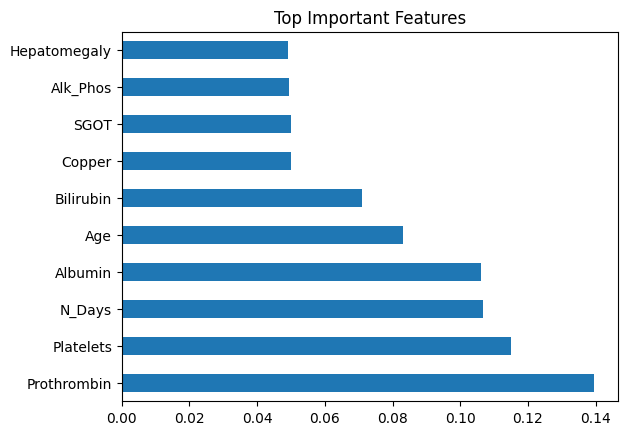

In [17]:
importances = best_model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.nlargest(10).plot(kind='barh')

plt.title("Top Important Features")
plt.show()

### 13. Building Prediction System

A prediction function is developed that takes new patient data as input and outputs the predicted liver cirrhosis stage. This demonstrates how the trained model can be used in real-world applications.

In [18]:
def predict_stage(input_data):

    input_data = np.array(input_data).reshape(1, -1)
    input_data = scaler.transform(input_data)

    prediction = best_model.predict(input_data)

    return prediction[0]

### 14. Model Saving and Deployment Preparation

The trained machine learning model is saved using serialization techniques so that it can be reused later without retraining. This is an important step for deployment and practical implementation.

In [19]:
sample = X.iloc[0].values
print("Predicted Stage:", predict_stage(sample))

Predicted Stage: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
joblib.dump(best_model, "liver_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

### Conclusion

This project demonstrates the application of machine learning techniques in healthcare for predicting liver cirrhosis stages using patient diagnosis data. Multiple models were trained and evaluated, and the best-performing model was selected based on accuracy and performance metrics. The system shows potential to assist healthcare professionals in early diagnosis and treatment planning.